In [4]:
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
log_file = "OneDriveStandaloneUpdaterDaemon.log"
names = []
with open(log_file, newline='') as log:
    reader = csv.reader(log)
    for row in reader:
        names.append(row[0].split(' '))

[i.pop(2) for i in names]
print(names[:10])

[['2020-02-06', '17:52:36.219', 'Initializing', 'Daemon'], ['2020-02-06', '17:52:36.221', 'Validating', 'connection'], ['2020-02-06', '17:52:36.223', 'Got', 'Attributes'], ['2020-02-06', '17:52:36.223', 'identifier', '"com.microsoft.OneDriveStandaloneUpdater"and', 'anchor', 'apple', 'generic', 'and', 'certificate', '1[field.1.2.840.113635.100.6.2.6]', '/*', 'exists', '*/', 'and', 'certificate', 'leaf[field.1.2.840.113635.100.6.1.13]', '/*', 'exists', '*/', 'and', 'certificate', 'leaf[subject.OU]', '=', 'UBF8T346G9'], ['2020-02-06', '17:52:36.228', 'Got', 'requirement'], ['2020-02-06', '17:52:36.282', 'Got', 'validated'], ['2020-02-06', '17:52:36.284', 'Got', 'Attributes'], ['2020-02-06', '17:52:36.284', 'identifier', '"com.microsoft.OneDriveStandaloneUpdater"and', 'anchor', 'apple', 'generic', 'and', 'certificate', '1[field.1.2.840.113635.100.6.2.6]', '/*', 'exists', '*/', 'and', 'certificate', 'leaf[field.1.2.840.113635.100.6.1.13]', '/*', 'exists', '*/', 'and', 'certificate', 'leaf[s

In [6]:
df = pd.DataFrame(names)

df = df.applymap(lambda s: s.lower() if type(s) == str else s)

columns = ['date', 'time', 'first_word', 'second_word', 'third_word']
for i in df.columns[5:]:
    columns.append("column_" + str(i))
columns

df.columns = columns
df.fillna("",inplace=True)
df['full_word'] = (df['first_word'] + ' ' + df['second_word'] + ' ' + df['third_word'])
df['timestamp'] = (df['date'] + ' ' + df['time'])
df.insert(5, 'full_word', df.pop('full_word'))
df.insert(2, 'timestamp', df.pop('timestamp'))

df.head()

,date,time,timestamp,first_word,second_word,third_word,full_word,column_5,column_6,column_7,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,initializing,daemon,,initializing daemon,,,,...,,,,,,,,,,
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,validating,connection,,validating connection,,,,...,,,,,,,,,,
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,got,attributes,,got attributes,,,,...,,,,,,,,,,
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,and,...,certificate,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,got,requirement,,got requirement,,,,...,,,,,,,,,,


In [7]:
df.describe()

,date,time,timestamp,first_word,second_word,third_word,full_word,column_5,column_6,column_7,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
count,6747,6747,6747,6747,6747,6747,6747,6747,6747,6747,...,6747,6747,6747,6747,6747,6747,6747,6747,6747,6747
unique,447,4026,4026,13,14,30,40,5,5,4,...,2,2,2,2,2,2,2,2,2,2
top,2021-07-28,12:35:27.756,2022-04-04 08:50:22.048,got,requirement,,got attributes,,,,...,,,,,,,,,,
freq,69,4,4,4296,1432,4838,1432,4938,4963,4989,...,5315,5315,5315,5315,5315,5315,5315,5315,5315,5315


In [8]:
# Removing whitespace from whole dataframe, copied directly from https://www.geeksforgeeks.org/pandas-
# strip-whitespace-from-entire-dataframe/#:~:text=str.,or%20index%20of%20an%20object.

def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':   
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:  
            # if condn. is False then it will do nothing.
            pass

# applying whitespace_remover function on dataframe
whitespace_remover(df)
 
# printing dataframe
df.head()

,date,time,timestamp,first_word,second_word,third_word,full_word,column_5,column_6,column_7,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,initializing,daemon,,initializing daemon,,,,...,,,,,,,,,,
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,validating,connection,,validating connection,,,,...,,,,,,,,,,
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,got,attributes,,got attributes,,,,...,,,,,,,,,,
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,and,...,certificate,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,got,requirement,,got requirement,,,,...,,,,,,,,,,


# Are all the timestamps unique? What is the resolution of each timestamp?

In [9]:

# Not all timestamps are unique
df['timestamp'].is_unique

date_time = []
df2 = df[(df['timestamp'] != 'no process')]

# Code to find resolution of each timestamp
res = []
for i in df2['timestamp']:
    res.append(i)

def time_res(resolution):
    for i in resolution:
        if (len(resolution) == 1):
            return "decisecond"
        elif (len(resolution) == 2):
            return "centisecond"
        elif (len(resolution) == 3):
            return "millisecond"
        elif (len(resolution) > 3) and (len(resolution) <= 6):
            return "microsecond"
        elif (len(resolution) > 6) and (len(resolution) <= 9):
            return "nanosecond"
        else:
            return "Larger than nanosecond"

resolutions = []
for val in res:
    res_split = val.split(".")
    rval = time_res(res_split[1])
    resolutions.append(rval)
resolutions

df2["resolutions"] = resolutions
df2.head()

<ipython-input-9-03c47429ed2a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["resolutions"] = resolutions


,date,time,timestamp,first_word,second_word,third_word,full_word,column_5,column_6,column_7,...,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,resolutions
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,initializing,daemon,,initializing daemon,,,,...,,,,,,,,,,millisecond
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,validating,connection,,validating connection,,,,...,,,,,,,,,,millisecond
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,got,attributes,,got attributes,,,,...,,,,,,,,,,millisecond
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,and,...,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9,millisecond
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,got,requirement,,got requirement,,,,...,,,,,,,,,,millisecond


# How many "Initializing Daemon" events are there? How many "Installing new Application" events are there?

In [10]:
# Finds how many "Initializing Daemon" events there are
intializing_daemon_events = df[df['full_word'] == 'initializing daemon']
print("There are " + str(len(intializing_daemon_events)) + " Initializing Daemon events")

# Finds how many "Installing new Application" events there are. 
# I consider "installing" and "installed" to be the same thing
installing_application_events = df[(df['full_word'] == 'installing new application') | (df['full_word'] == 'installed new application')]
print("There are " + str(len(installing_application_events)) + " Installing new Application events")

There are 57 Initializing Daemon events
There are 50 Installing new Application events


# What are the earliest and latest timestamps in this log?  How many days does that period represent?

In [22]:
df2 = df[df.timestamp != 'no process']

min_time_stamp = min(df2['timestamp'])
print('The earliest timestamp in this log is: ' + min_time_stamp)

max_time_stamp = max(df2['timestamp'])
print('The latest timestamp in this log is: ' + max_time_stamp)

The earliest timestamp in this log is: 2020-02-06 17:52:36.219
The latest timestamp in this log is: 2022-04-13 01:29:51.976


In [23]:
# finding how many days are between february 6, 2020 and april 13, 2022
earliest = datetime(2020, 2, 6, 17, 52, 36)
latest = datetime(2022, 4, 13, 1, 29, 51)

days_between = latest - earliest
print('The difference between these two timestamps is: ' + str(days_between))

The difference between these two timestamps is: 796 days, 7:37:15


# Grouping all events by hour of each day and counting events in each hour

In [13]:
# Retrieving the hour from the date column and creating a new column "hour" with all of our hours

hour = []
for i in df2['time']:
    time = i.split(":")
    hour.append(time[0])
hour

df2['hour'] = hour

df2.insert(3, 'hour', df2.pop('hour'))
df2.head()

<ipython-input-13-6ab7476823b5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hour'] = hour


,date,time,timestamp,hour,first_word,second_word,third_word,full_word,column_5,column_6,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,17,initializing,daemon,,initializing daemon,,,...,,,,,,,,,,
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,17,validating,connection,,validating connection,,,...,,,,,,,,,,
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,17,got,attributes,,got attributes,,,...,,,,,,,,,,
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,17,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,...,certificate,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,17,got,requirement,,got requirement,,,...,,,,,,,,,,


In [14]:
# Group data by the hour of each day
group = df2.groupby(by = ["hour"])
count_ser = group.hour.count()

# Get a dataframe with every hour (0-23) and the total number of events for each hour 
hourly_events = pd.DataFrame(data = {"events_per_hour": count_ser}).reset_index(level = ['hour'])
hourly_events

,hour,events_per_hour
0,00,100
1,01,191
2,02,112
3,03,57
4,04,141
5,05,140
6,06,56
7,07,183
8,08,183
9,09,428


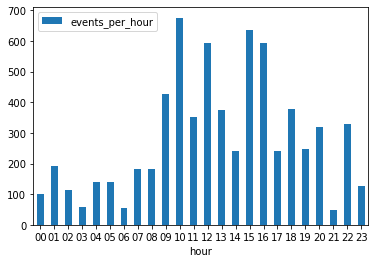

In [15]:
# making a bar plot with 24 bars representing the counts of each event per hour
bar_plot_with_counts = hourly_events.plot.bar(x = 'hour', y='events_per_hour', rot = 0)
bar_plot_with_counts
plt.show()

# Grouping all events by days of the week and counting events in each day

In [25]:
# Retrieving the day from the date column and creating a new column "day" with all of our days
day = []
for i in df2['date']:
    time = i.split("-")
    day.append(time[2])
day

df2['day'] = day

df2.insert(3, 'day', df2.pop('day'))
df2.head()

<ipython-input-25-dd3da92c100d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = day


,date,time,timestamp,day,first_word,second_word,third_word,full_word,column_5,column_6,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,06,initializing,daemon,,initializing daemon,,,...,,,,,,,,,,
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,06,validating,connection,,validating connection,,,...,,,,,,,,,,
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,06,got,attributes,,got attributes,,,...,,,,,,,,,,
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,06,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,...,certificate,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,06,got,requirement,,got requirement,,,...,,,,,,,,,,


In [28]:
# Group data by the days of the week
group = df2.groupby(by = ["day"])
count_ser = group.day.count()

# Get a dataframe with every hour (0-23) and the total number of events for each hour 
daily_events = pd.DataFrame(data = {"events_per_day": count_ser}).reset_index(level = ['day'])
days_of_week = [0, 1, 2, 3, 4, 5, 6]
weekly = dict.fromkeys(days_of_week, 0)
daily_events['day'] = daily_events['day'].astype(int)

for row in range(len(daily_events['day'])):
    if row % 7 == 0:
        weekly[0] += daily_events['events_per_day'][row]
    if row % 7 == 1:
        weekly[1] += daily_events['events_per_day'][row]
    if row % 7 == 2:
        weekly[2] += daily_events['events_per_day'][row]
    if row % 7 == 3:
        weekly[3] += daily_events['events_per_day'][row]
    if row % 7 == 4:
        weekly[4] += daily_events['events_per_day'][row]
    if row % 7 == 5:
        weekly[5] += daily_events['events_per_day'][row]
    if row % 7 == 6:
        weekly[6] += daily_events['events_per_day'][row]
print(weekly)

{0: 1004, 1: 1126, 2: 913, 3: 924, 4: 904, 5: 886, 6: 988}


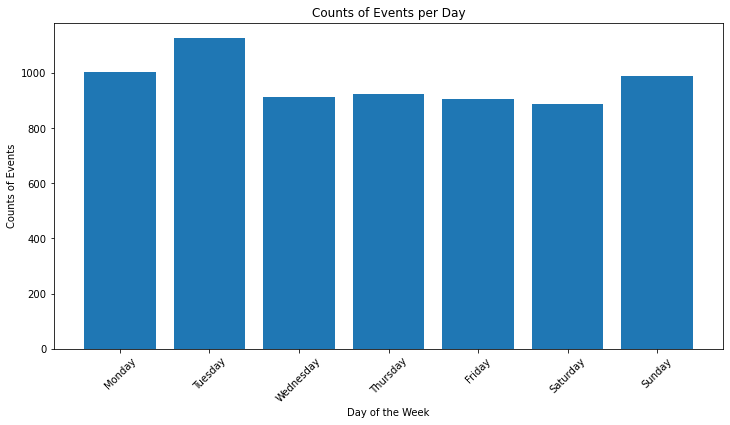

In [27]:
# day 0 represents Monday, day 1 represents Tuesday, etc.
fig = plt.figure(figsize =(12, 6))

plt.bar(weekly.keys(), weekly.values())
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Counts of Events')
plt.title('Counts of Events per Day')
plt.show()

# Roughly how often does this daemon get initialized per month, day, and year?

<ipython-input-19-cbd270aff3e2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['month'] = month
<ipython-input-19-cbd270aff3e2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['month'] = df_daemon['month'].astype(int)


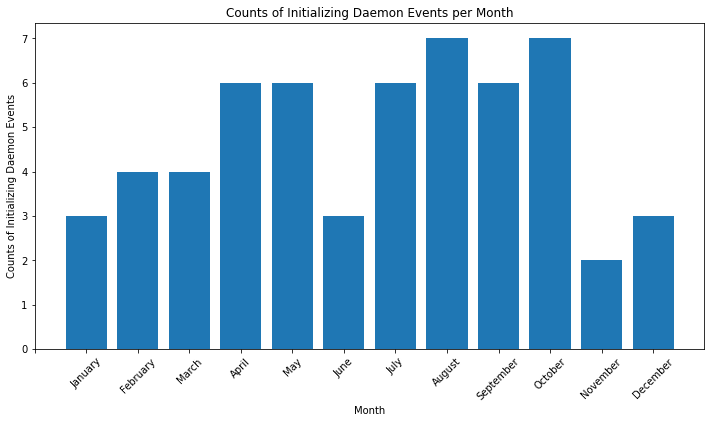

In [19]:
# Need to find the frequency of "initializing daemon" events per month

# create new dataframe that only contains initializing daemon events
df_daemon = df2[df2.full_word == 'initializing daemon']

month = []
# finding the month for each event
for i in df_daemon['date']:
    date = i.split("-")
    month.append(date[1])
month

df_daemon['month'] = month

# adding data to dataframe
df_daemon.insert(3, 'month', df_daemon.pop('month'))
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
monthly = dict.fromkeys(months, 0)

# adding up number of events for each month
df_daemon['month'] = df_daemon['month'].astype(int)
for month in df_daemon['month']:
    monthly[month] += 1 

fig = plt.figure(figsize =(12, 6))

# plot month vs. counts of events for those months
plt.bar(monthly.keys(), monthly.values())
plt.xticks(np.arange(13), ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Counts of Initializing Daemon Events')
plt.title('Counts of Initializing Daemon Events per Month')
plt.show()

<ipython-input-20-528d4c5cd406>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['day'] = days
<ipython-input-20-528d4c5cd406>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['day'] = df_daemon['day'].astype(int)


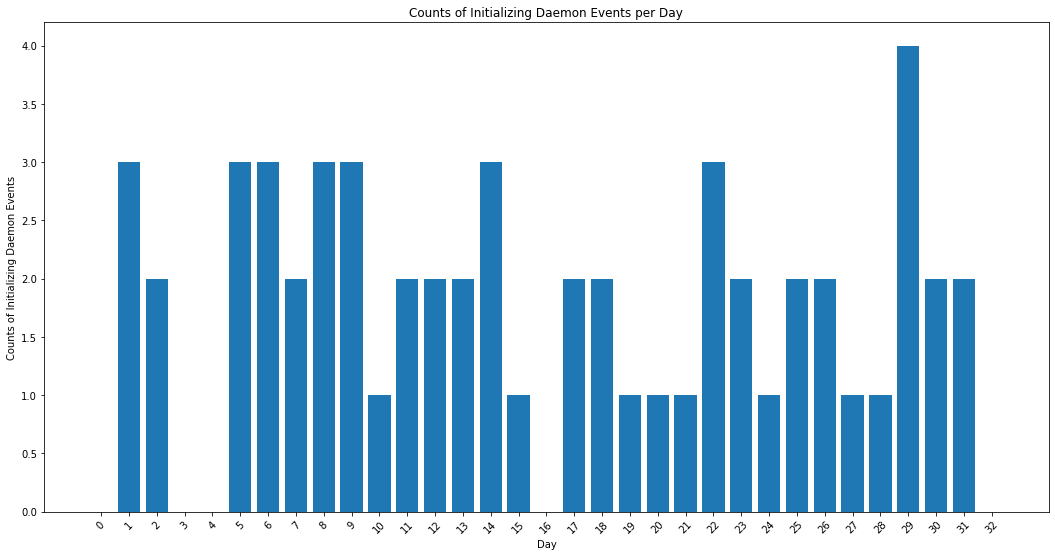

In [20]:
# show how many "initializing daemon" events happen on certain days throughout whole logfile

# find the day for each event using split method and indexing
days = []
for i in df_daemon['date']:
    date = i.split("-")
    days.append(date[2])
days

df_daemon['day'] = days

# insert column at specific location in dataframe
df_daemon.insert(3, 'day', df_daemon.pop('day'))

days_list = list(range(0,33))
daily = dict.fromkeys(days_list, 0)

# adding up number of events for each day into dictionary
df_daemon['day'] = df_daemon['day'].astype(int)

for day in df_daemon['day']:
    if day in days_list:
        daily[day] += 1 

fig = plt.figure(figsize =(18, 9))
# plot days vs. count of events for those days
plt.bar(daily.keys(), daily.values())
plt.xticks(np.arange(33), days_list)
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Counts of Initializing Daemon Events')
plt.title('Counts of Initializing Daemon Events per Day')
plt.show()

<ipython-input-21-1d55b3a653e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['year'] = year


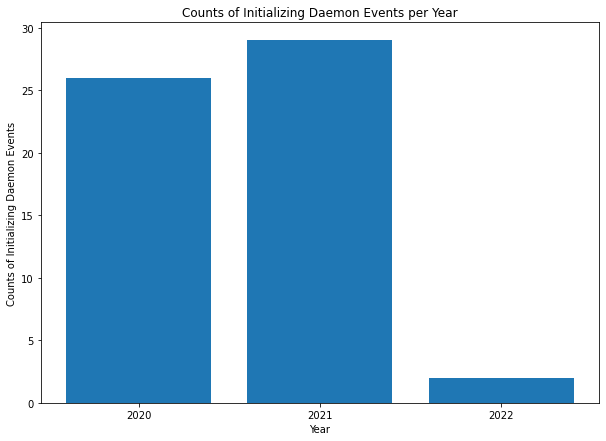

In [21]:
# frequency of initializing daemon events per year

# find what the year is for each event using split method and indexing
year = []
for i in df_daemon['date']:
    date = i.split("-")
    year.append(date[0])
year
df_daemon['year'] = year
# insert this data into dataframe
df_daemon.insert(3, 'year', df_daemon.pop('year'))
df_daemon.head()

# add up number of events for each year into a dictionary
years = ['2020', '2021', '2022']
yearly = dict.fromkeys(years, 0)

for year in df_daemon['year']:
    if year == '2020':
        yearly['2020'] += 1
    if year == '2021':
        yearly['2021'] += 1
    if year == '2022':
        yearly['2022'] += 1

fig = plt.figure(figsize =(10, 7))
# plot year vs. count of events for those years
plt.bar(yearly.keys(), yearly.values())
plt.xlabel('Year')
plt.ylabel('Counts of Initializing Daemon Events')
plt.title('Counts of Initializing Daemon Events per Year')
plt.show()